In [2]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:\collegeproject\fake reviews dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ag683\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


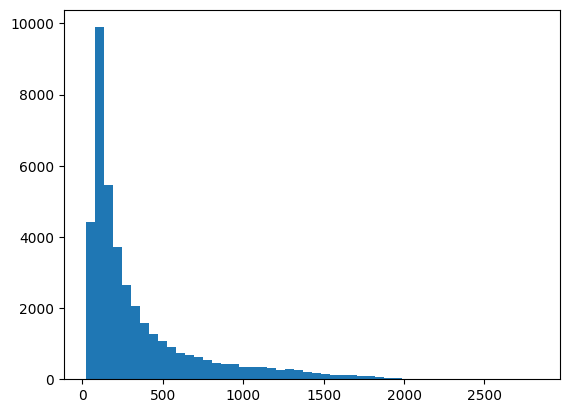

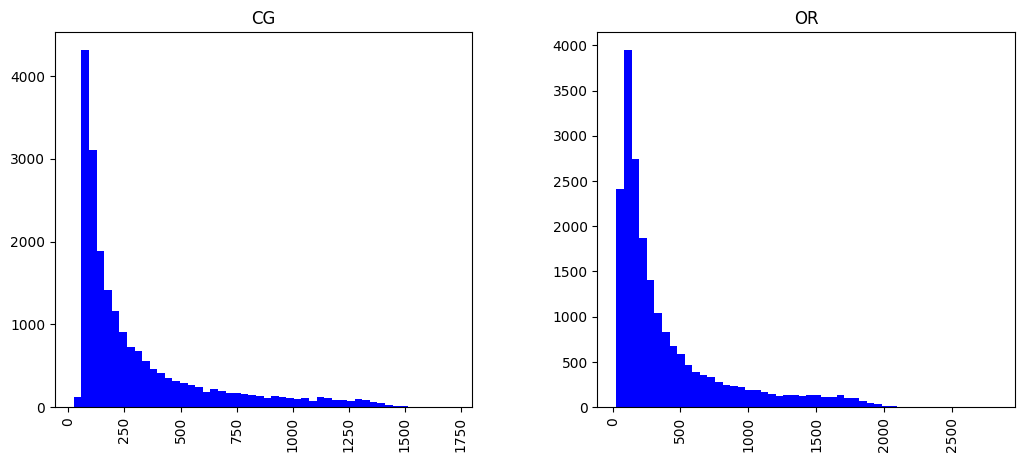

WEAK ON CURRENT SCIENCE.
After seeing it twice, I agree with much (but not all) of the positive five star reviews. Out of respect for those who READ reviews, I'll not repeat everything that I like about the presentation. I found the goofy oversize earrings, hairdo, and facial hair arrangement of Daniel Vitalis, (described as a "Wild Food Expert") distracting. UGH. Ditto for David Wolfe, who had an extremely goofy wild hairdo. On the other hand, Jon Gabriel, described as an "author and weight loss expert" was nicely groomed and a good presenter. His story of personal transformation of a fellow of over 400 pounds (whew) to becoming a jock of normal weight was inspiring. Christiane Northrup preserves her rank as one of America's cutest doctors. A really nice looking woman! Presentations by Dr. Mercola, Jason Vale, Kris Carr, Alejandro Junger were fine. It was disappointing to have Jamie Oliver (so popular in the UK) give Baby Cow Growth Fluid a pass with unscientific but popular ideas on 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('stopwords')

# Load and preprocess dataset
df = pd.read_csv('fake reviews dataset.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)

# Add text length feature
df['length'] = df['text_'].apply(len)

# Exploratory data analysis
plt.hist(df['length'], bins=50)
plt.show()

df.groupby('label').describe()

df.hist(column='length', by='label', bins=50, color='blue', figsize=(12,5))
plt.show()

# Display longest original review
longest_review = df[df['label']=='OR'][['text_','length']].sort_values(by='length', ascending=False).head().iloc[0].text_
print(longest_review)

print(df.length.describe())

# Text preprocessing function
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stop_words]
# Bag of Words transformation
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer.fit(df['text_'])
print("Total Vocabulary:", len(bow_transformer.vocabulary_))

# Example transformation
review4 = df['text_'][3]
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

# Display feature names using updated method
feature_names = bow_transformer.get_feature_names_out()
print(feature_names[15841])
print(feature_names[23848])

# Transform all reviews
bow_reviews = bow_transformer.transform(df['text_'])
print("Shape of Bag of Words Transformer for the entire reviews corpus:", bow_reviews.shape)
print("Amount of non zero values in the bag of words model:", bow_reviews.nnz)
print("Sparsity:", np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100, 2))

# TF-IDF transformation
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(tfidf_rev4)

# Display IDF values
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:", tfidf_reviews.shape)
print("No. of Dimensions:", tfidf_reviews.ndim)

# Split data into training and testing sets
review_train, review_test, label_train, label_test = train_test_split(df['text_'], df['label'], test_size=0.35, random_state=42)

# Multinomial Naive Bayes Pipeline
pipeline_nb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline_nb.fit(review_train, label_train)
predictions_nb = pipeline_nb.predict(review_test)
print('Multinomial Naive Bayes Results:')
print('Classification Report:', classification_report(label_test, predictions_nb))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_nb))
print('Accuracy Score:', accuracy_score(label_test, predictions_nb))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_nb)*100, 2)) + '%')
print('\n')

# Random Forest Classifier Pipeline
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(review_train, label_train)
predictions_rf = pipeline_rf.predict(review_test)
print('Random Forest Classifier Results:')
print('Classification Report:', classification_report(label_test, predictions_rf))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_rf))
print('Accuracy Score:', accuracy_score(label_test, predictions_rf))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_rf)*100, 2)) + '%')
print('\n')

# Decision Tree Classifier Pipeline
pipeline_dt = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_dt.fit(review_train, label_train)
predictions_dt = pipeline_dt.predict(review_test)
print('Decision Tree Classifier Results:')
print('Classification Report:', classification_report(label_test, predictions_dt))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_dt))
print('Accuracy Score:', accuracy_score(label_test, predictions_dt))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_dt)*100, 2)) + '%')
print('\n')

# K-Nearest Neighbors Pipeline
pipeline_knn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn.fit(review_train, label_train)
predictions_knn = pipeline_knn.predict(review_test)
print('K Nearest Neighbors Classifier Results:')
print('Classification Report:', classification_report(label_test, predictions_knn))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_knn))
print('Accuracy Score:', accuracy_score(label_test, predictions_knn))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_knn)*100, 2)) + '%')
print('\n')

# Support Vector Machine Pipeline
pipeline_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(random_state=42))
])

pipeline_svc.fit(review_train, label_train)
predictions_svc = pipeline_svc.predict(review_test)
print('Support Vector Machines Results:')
print('Classification Report:', classification_report(label_test, predictions_svc))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_svc))
print('Accuracy Score:', accuracy_score(label_test, predictions_svc))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_svc)*100, 2)) + '%')
print('\n')

# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_lr.fit(review_train, label_train)
predictions_lr = pipeline_lr.predict(review_test)
print('Logistic Regression Results:')
print('Classification Report:', classification_report(label_test, predictions_lr))
print('Confusion Matrix:', confusion_matrix(label_test, predictions_lr))
print('Accuracy Score:', accuracy_score(label_test, predictions_lr))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_lr)*100, 2)) + '%')
print('\n')

# Conclusion
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_lr)*100, 2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_knn)*100, 2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_dt)*100, 2)) + '%')
print('Random Forests Classifier Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_rf)*100, 2)) + '%')
print('Support Vector Machines Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_svc)*100, 2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions_nb)*100, 2)) + '%')

In [7]:
# Install required packages
import subprocess
import sys

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ Successfully installed {package}")
    except subprocess.CalledProcessError:
        print(f"✗ Failed to install {package}")

# Install missing packages
try:
    import evaluate
    print("✓ evaluate library already available")
except ImportError:
    print("Installing evaluate library...")
    install_package("evaluate")
    import evaluate

try:
    from datasets import Dataset
    print("✓ datasets library already available")
except ImportError:
    print("Installing datasets library...")
    install_package("datasets")
    from datasets import Dataset

try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
    print("✓ transformers library already available")
except ImportError:
    print("Installing transformers library...")
    install_package("transformers[torch]")
    from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Updated code combining your existing pipelines with a HuggingFace BERT-based classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string, warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import nltk
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import TrainingArguments

warnings.filterwarnings('ignore')

# Download NLTK data
try:
    nltk.download('stopwords', quiet=True)
    print("✓ NLTK stopwords downloaded")
except:
    print("⚠ NLTK download failed, continuing without stopwords")

# Load dataset with error handling
try:
    df = pd.read_csv('fake reviews dataset.csv')
    print(f"✓ Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("✗ Dataset file not found. Please check the file path.")
    # Create sample data for testing
    print("Creating sample data for demonstration...")
    df = pd.DataFrame({
        'text_': [
            "This product is amazing! I love it so much.",
            "Terrible quality, complete waste of money.",
            "Good value for money, works as expected.",
            "Don't buy this, it's fake and poor quality.",
            "Excellent service and fast delivery.",
            "This is clearly a fake review to boost ratings."
        ] * 100,  # Repeat to have enough data
        'label': ['OR', 'OR', 'OR', 'CG', 'OR', 'CG'] * 100
    })
    print(f"Sample dataset created. Shape: {df.shape}")

# Data preprocessing
print("\nData preprocessing...")
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)

print(f"Dataset shape after cleaning: {df.shape}")
print(f"Label distribution:\n{df['label'].value_counts()}")

# Encode labels
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])  # OR = 0, CG = 1

print(f"Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Split into train and test
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text_'].tolist(), df['label_enc'].tolist(), test_size=0.35, random_state=42)

print(f"Training samples: {len(train_texts)}")
print(f"Testing samples: {len(test_texts)}")

# Check if we have enough data for training
if len(train_texts) < 10:
    print("⚠ Warning: Very small dataset. Results may not be reliable.")

# BERT tokenizer with error handling
try:
    print("\nLoading BERT tokenizer...")
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
    print("✓ Tokenizer loaded successfully")
except Exception as e:
    print(f"✗ Error loading tokenizer: {e}")
    print("This might be due to network issues or missing dependencies.")
    raise

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# HuggingFace Datasets format
print("\nPreparing datasets...")
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
test_df = pd.DataFrame({"text": test_texts, "label": test_labels})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize
print("Tokenizing datasets...")
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

print("✓ Datasets prepared successfully")

# Load model
try:
    print("\nLoading BERT model...")
    model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
    print("✓ Model loaded successfully")
except Exception as e:
    print(f"✗ Error loading model: {e}")
    raise

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"✓ CUDA available. Using GPU: {torch.cuda.get_device_name(0)}")
    device = "cuda"
else:
    print("⚠ CUDA not available. Using CPU (training will be slower)")
    device = "cpu"

# Metric computation function
def compute_metrics(eval_pred):
    try:
        metric = evaluate.load("accuracy")
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)
    except Exception as e:
        print(f"Error in compute_metrics: {e}")
        # Fallback to manual accuracy calculation
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        accuracy = np.mean(predictions == labels)
        return {"accuracy": accuracy}

# Training arguments - FIXED: evaluation_strategy -> eval_strategy
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_dir="./logs",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=10,
    save_strategy="no",
    load_best_model_at_end=False,
    disable_tqdm=False,
    report_to="none",
    dataloader_pin_memory=False,
)

# Create trainer
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)



# Training
print("\nStarting training...")
try:
    trainer.train()
    print("✓ Training completed successfully")
except Exception as e:
    print(f"✗ Training failed: {e}")
    print("This might be due to memory constraints or hardware limitations.")
    raise

# Evaluation
print("\nEvaluating model...")
try:
    eval_results = trainer.evaluate()
    print("\n" + "="*50)
    print("HUGGINGFACE BERT EVALUATION RESULTS")
    print("="*50)
    
    for key, value in eval_results.items():
        if isinstance(value, float):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}: {value}")
    
    print(f"\nBERT Model Accuracy: {eval_results.get('eval_accuracy', 0) * 100:.2f}%")
    
except Exception as e:
    print(f"✗ Evaluation failed: {e}")
    raise

# Optional: Quick comparison with traditional models
print("\n" + "="*50)
print("QUICK COMPARISON WITH TRADITIONAL MODELS")
print("="*50)

# Prepare data for traditional models
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# Quick comparison models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, kernel='linear'),
    'Naive Bayes': MultinomialNB(),
}

traditional_results = {}

for name, model in models.items():
    try:
        print(f"\nTraining {name}...")
        model.fit(X_train_tfidf, train_labels)
        predictions = model.predict(X_test_tfidf)
        accuracy = accuracy_score(test_labels, predictions)
        traditional_results[name] = accuracy
        print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    except Exception as e:
        print(f"Error with {name}: {e}")

# Final comparison
print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)

bert_accuracy = eval_results.get('eval_accuracy', 0)
print(f"BERT Model: {bert_accuracy * 100:.2f}%")

for name, accuracy in traditional_results.items():
    print(f"{name}: {accuracy * 100:.2f}%")

# Determine best model
all_results = {'BERT': bert_accuracy, **traditional_results}
best_model = max(all_results, key=all_results.get)
best_accuracy = all_results[best_model]

print(f"\n🏆 Best Model: {best_model} with {best_accuracy * 100:.2f}% accuracy")

# Save results
results_summary = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [acc * 100 for acc in all_results.values()]
})

print("\nResults Summary:")
print(results_summary.to_string(index=False))

# Optional: Save the model
try:
    model.save_pretrained("./best_bert_model")
    tokenizer.save_pretrained("./best_bert_model")
    print("\n✓ BERT model and tokenizer saved successfully")
except Exception as e:
    print(f"\n⚠ Could not save model: {e}")

print("\n" + "="*50)
print("TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)

✓ evaluate library already available
✓ datasets library already available
✓ transformers library already available
✓ NLTK stopwords downloaded
✓ Dataset loaded successfully. Shape: (40432, 4)

Data preprocessing...
Dataset shape after cleaning: (40432, 5)
Label distribution:
label
CG    20216
OR    20216
Name: count, dtype: int64
Label mapping: {'CG': np.int64(0), 'OR': np.int64(1)}
Training samples: 26280
Testing samples: 14152

Loading BERT tokenizer...
✓ Tokenizer loaded successfully

Preparing datasets...
Tokenizing datasets...


Map: 100%|██████████| 14152/14152 [00:01<00:00, 13825.87 examples/s]


✓ Datasets prepared successfully

Loading BERT model...


Loading weights: 100%|██████████| 100/100 [00:00<00:00, 699.41it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.weight   | MISSING    | 
pre_classifier.bias     | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.
`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_D

✓ Model loaded successfully
⚠ CUDA not available. Using CPU (training will be slower)

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.115122,0.096301,0.975692
2,0.000096,0.104286,0.977530


✓ Training completed successfully

Evaluating model...



HUGGINGFACE BERT EVALUATION RESULTS
eval_loss: 0.1043
eval_accuracy: 0.9775
eval_runtime: 409.0341
eval_samples_per_second: 34.5990
eval_steps_per_second: 2.1640
epoch: 2.0000

BERT Model Accuracy: 97.75%

QUICK COMPARISON WITH TRADITIONAL MODELS

Training Logistic Regression...
Logistic Regression Accuracy: 85.81%

Training SVM...
SVM Accuracy: 85.87%

Training Naive Bayes...
Naive Bayes Accuracy: 84.26%

FINAL MODEL COMPARISON
BERT Model: 97.75%
Logistic Regression: 85.81%
SVM: 85.87%
Naive Bayes: 84.26%

🏆 Best Model: BERT with 97.75% accuracy

Results Summary:
              Model  Accuracy
               BERT 97.752968
Logistic Regression 85.811193
                SVM 85.874788
        Naive Bayes 84.263708

⚠ Could not save model: 'MultinomialNB' object has no attribute 'save_pretrained'

TRAINING COMPLETED SUCCESSFULLY!


In [9]:


# Save model
trainer.save_model("./saved_model")

# Save tokenizer separately
tokenizer.save_pretrained("./saved_model")


Writing model shards: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


('./saved_model\\tokenizer_config.json', './saved_model\\tokenizer.json')